In [ ]:
import numpy as np

## Part 1: The Polynomial Class

In [ ]:
# `Polynomial` is the blueprint, and `p = Polynomial([1, 0, 2])` creates an actual polynomial object named `p`.

class Polynomial:
  def __init__(self, coeff):

    # coeff (list or np.ndarray): A list or NumPy array of coefficients, ordered from the lowest degree (a_0) to the highest (a_n).

    self.coeff = np.array(coeff, dtype = np.float64) # just making sure we work with numpy array with float values
    self. degree = len(self.coeff) -1  # The degree is always one less than the number of coefficients.

  def __repr__(self):
    # This is a "magic method" in Python. When you use print(p1), Python looks for a __repr__ (or __str__) method to decide what to display.
    # Without it, you'd just see something unhelpful like <__main__.Polynomial object at 0x7f12345>. We want it to look like a real equation.

    output = f"The Polynomial of degree {self.degree}\nP(x) = "
    for i in range(self.degree + 1):
      a_i = self.coeff[i]

      if i == 0:
        output += f"{a_i}x^0 "

      else:
        if a_i >= 0:
          output += f"+ {a_i}x^{i} "

        else:
          output += f"- {-a_i}x^{i} "

    return output


  def __call__(self, x_arr):
    # This magic method does the calculation of P(x) for every x value, puts in an output array, and returns it.


    x_arr = np.array(x_arr)
    if x_arr.shape == (): # only a value was given
      x_arr = np.array([x_arr])

    output = np.zeros(x_arr.shape)

    for i in range(len(x_arr)):
      for j in range(self.degree + 1):

        output[i] += self.coeff[j] * (x_arr[i] ** j)

    return output

  def get_degree(self):
    return self.degree

  def get_coeff(self):
    return self.coeff

In [ ]:
# --- Test for __init__ ---
# Let's represent p(x) = 5x^4 + 0x^3 + 2x^2 + 0x^1 + 1
# Coefficients are [a0, a1, a2, a3, a4]
coeff_vector = [1, 0, 2, 0, 5]
p1 = Polynomial(coeff_vector)

# Check the attributes
print("Coefficients of p1:", p1.coeff)
print("Degree of p1:", p1.degree)

# --- Verification ---
assert p1.degree == 4
assert np.array_equal(p1.coeff, np.array([1., 0., 2., 0., 5.]))
print("\n__init__ method works correctly!")

Coefficients of p1: [1. 0. 2. 0. 5.]
Degree of p1: 4

__init__ method works correctly!


In [ ]:
# --- Test for __repr__ ---
p_positive = Polynomial([-5]) # 5x^2 + 2x + 1
p_negative = Polynomial([-3, -4, 0, 1]) # x^3 - 4x - 3
p_mixed = Polynomial([-1, 0, -2, 0, -5]) # 5x^4 - 2x^2 + 1

print(p_positive)
print("\n" + "-" * 20)
print(p_negative)
print("\n" + "-" * 20)
print(p_mixed)

The Polynomial of degree 0
P(x) = -5.0x^0 

--------------------
The Polynomial of degree 3
P(x) = -3.0x^0 - 4.0x^1 + 0.0x^2 + 1.0x^3 

--------------------
The Polynomial of degree 4
P(x) = -1.0x^0 + 0.0x^1 - 2.0x^2 + 0.0x^3 - 5.0x^4 


In [ ]:
# --- Test for __call__ ---
p = Polynomial([1, 0, 2, 0, 5]) # 5x^4 + 2x^2 + 1

# Test with a single value
print(f"p(2) = {p(2)}")
# Expected: 5*(16) + 2*(4) + 1 = 80 + 8 + 1 = 89

# Test with an array of values
x_arr = np.array([1, 2, 3])
y_arr = p(x_arr)
print(f"p([1, 2, 3]) = {y_arr}")
# Expected: [8, 89, 424]

# --- Verification ---
np.testing.assert_almost_equal(p(2), 89)
np.testing.assert_array_almost_equal(p(x_arr), [8., 89., 424.])
print("\n__call__ method works correctly!")

p(2) = [89.]
p([1, 2, 3]) = [  8.  89. 424.]

__call__ method works correctly!


## **Part 2: Solving for the Polynomial - The Vandermonde Matrix Method**

This is the core numerical method of Lab 2. It turns the problem of finding a polynomial into a problem of solving a system of linear equations.

#### **A. The Core Concept: From Points to a System of Equations**

*   **Theory:** If you have $n+1$ points $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$, and you want to find a degree-$n$ polynomial that passes through them, you are essentially saying:
    *   $a_0 + a_1 x_0 + a_2 x_0^2 + ... + a_n x_0^n = y_0$
    *   $a_0 + a_1 x_1 + a_2 x_1^2 + ... + a_n x_1^n = y_1$
    *   ...
    *   $a_0 + a_1 x_n + a_2 x_n^2 + ... + a_n x_n^n = y_n$
    This is a system of $n+1$ linear equations with $n+1$ unknown coefficients ($a_0, ..., a_n$).

#### **B. The Matrix Formulation: $Xa = y$**

*   **Theory:** The system above can be rewritten in the elegant matrix form $Xa = y$, where:
    *   **`X` (The Vandermonde Matrix):** An $(n+1) \times (n+1)$ matrix where each row consists of the powers of a corresponding $x_i$ value, from $x_i^0$ to $x_i^n$.
        
        `X` = \begin{bmatrix} 1 & x_0 & x_0^2 & \cdots & x_0^n \\ 1 & x_1 & x_1^2 & \cdots & x_1^n \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_n & x_n^2 & \cdots & x_n^n \\ \end{bmatrix}
    *   **`a` (The Coefficient Vector):** The vector of unknown coefficients we are trying to find.
    *   **`y` (The Output Vector):** The vector of known $y_i$ values.

#### **C. The Solution: $a = X^{-1}y$**

*   **Theory:** The solution to the system is found by inverting the Vandermonde matrix and multiplying it by the `y` vector. This is a direct application of linear algebra.

#### **D. The Implementation: A `get_poly(data_x, data_y)` Function**
*This function encapsulates the entire Vandermonde method.*

1.  **Step 1: Get the size.** Determine $n+1$, the number of data points (which is `len(data_x)`).

2.  **Step 2: Build the Vandermonde Matrix `X`.**
    *   This is the heart of the algorithm. You will create an empty $(n+1) \times (n+1)$ matrix using `np.zeros()`.
    *   You will then use a nested loop to populate this matrix, where `X[i, j] = data_x[i] ** j`.

3.  **Step 3: Solve the system.**
    *   Use `np.linalg.inv(X)` to get the inverse of the Vandermonde matrix. (Note: The lab file uses `np.linalg.pinv` which is the pseudo-inverse, a more robust choice for ill-conditioned matrices, but `inv` is the direct theoretical tool).
    *   Use `np.dot()` (or `@`) to multiply the inverse matrix by the `data_y` vector to get the coefficient vector `a`.

4.  **Step 4: Return the Polynomial.**
    *   Use the `a` vector you just found to create an instance of the `Polynomial` class you built in Part 1.
    *   Return this object.

In [ ]:
# get_poly(data_x, data_y): We give it the raw data (the points), and it gives us back a finished product (the Polynomial object that fits those points).

def get_poly(data_x, data_y):
    """
    Finds the interpolating polynomial using the Vandermonde Matrix method.

    Args:
      data_x (np.ndarray): The x-coordinates of the data points.
      data_y (np.ndarray): The y-coordinates of the data points.

    Returns:
      (Polynomial): A Polynomial object representing the unique interpolating polynomial.
    """
    # Number of data points (which is n+1 in our theory)
    num_points = len(data_x)

    # 1. Prepare the (n+1) x (n+1) Vandermonde matrix with zeros.
    X = np.zeros((num_points, num_points))

    # 2. Populate the Vandermonde matrix.
    # Loop through each row (for each data point x_i)
    for i in range(num_points):
        # Loop through each column (for each power j)
        for j in range(num_points):
            X[i, j] = data_x[i] ** j

    print("--- Vandermonde Matrix X ---")
    print(X)

    # 3. Solve the system Xa = y for a. The solution is a = inv(X) @ y

    # First, find the inverse of X
    # Note: Using np.linalg.pinv (pseudo-inverse) is safer for matrices that are nearly singular. We'll use the direct np.linalg.inv to match the theory Xa=y => a = X^-1y
    try:
        X_inv = np.linalg.inv(X)
        print("\n--- Inverse Matrix X_inv ---")
        print(X_inv)
    except np.linalg.LinAlgError:
        print("\nMatrix is singular, cannot compute a unique polynomial.")
        return None

    # Now, multiply the inverse by the y_vector to get the coefficients
    a_coeffs = X_inv @ data_y
    print("\n--- Solved Coefficient Vector 'a' ---")
    print(a_coeffs)

    # 4. Create and return the Polynomial object using these coefficients.
    p = Polynomial(a_coeffs)
    return p

In [ ]:
# --- Test for get_poly ---
# The data points
test_x = np.array([-0.75, 0.5, 1.5])
test_y = np.array([1.87, 2.20, 2.44])

# Find the polynomial
interpolating_p = get_poly(test_x, test_y)

# Print the resulting polynomial object using our __repr__ method
print("\n--- The Interpolating Polynomial ---")
print(interpolating_p)

# at x = 3,
value_at_3 = interpolating_p(3)
print(f"\nValue of the polynomial at x=3 is: {value_at_3:.4f}")

# --- Verification ---
# Let's check if the polynomial actually passes through our original points.
# The result should be very close to our original test_y vector.
print("\n--- Verification: Does p(test_x) equal test_y? ---")
print("p(test_x) =", interpolating_p(test_x))
print("Original test_y =", test_y)
np.testing.assert_array_almost_equal(interpolating_p(test_x), test_y)
print("\nVerification successful! The polynomial passes through all points.")

--- Vandermonde Matrix X ---
[[ 1.     -0.75    0.5625]
 [ 1.      0.5     0.25  ]
 [ 1.      1.5     2.25  ]]

--- Inverse Matrix X_inv ---
[[ 0.26666667  0.9        -0.16666667]
 [-0.71111111  0.6         0.11111111]
 [ 0.35555556 -0.8         0.44444444]]

--- Solved Coefficient Vector 'a' ---
[ 2.072       0.26133333 -0.01066667]

--- The Interpolating Polynomial ---
Polynomial of degree 2
p(x) = - 0.010666666666666873x^2 + 0.26133333333333325x + 2.072 

Value of the polynomial at x=3 is: 2.7600

--- Verification: Does p(test_x) equal test_y? ---
p(test_x) = [1.87 2.2  2.44]
Original test_y = [1.87 2.2  2.44]

Verification successful! The polynomial passes through all points.


## Practice problems:

###**Task 1:**
Using the `interpolating_p` object we just created, write the code to generate a plot.
1.  Generate 100 x-values for a smooth curve from -1 to 2 using `np.linspace`.
2.  Evaluate your polynomial `interpolating_p` for these x-values to get the y-values for the curve.
3.  Plot the smooth curve (x and y values from steps 1 & 2).
4.  Plot the original data points (`test_x`, `test_y`) as distinct markers (e.g., red circles 'ro').
5.  Add a title and labels to your plot.
6.  Show the plot.

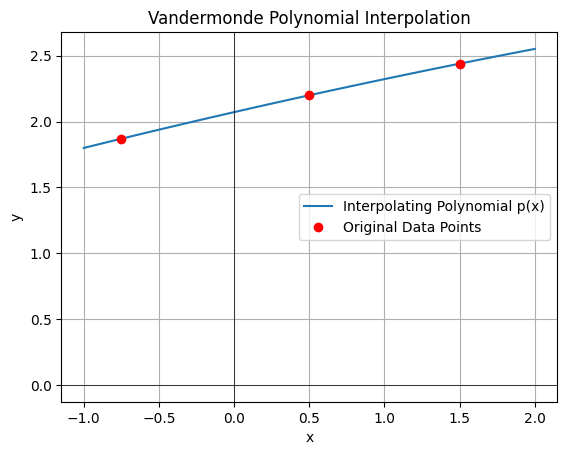

In [ ]:
import matplotlib.pyplot as plt

# 1. Generate x-values for a smooth curve. We'll go slightly beyond the original
#    data points to see the polynomial's behavior.
x_curve = np.linspace(-1.0, 2.0, 100)

# 2. Evaluate the polynomial for these x-values.
y_curve = interpolating_p(x_curve)

# 3. Plot the smooth polynomial curve.
plt.plot(x_curve, y_curve, label='Interpolating Polynomial p(x)')

# 4. Plot the original data points as red circles.
plt.plot(test_x, test_y, 'ro', label='Original Data Points')

# 5. Add title, labels, and a legend for clarity.
plt.title("Vandermonde Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# 6. Show the plot.
plt.show()

### **Task 2:**

---
> The first objective is to find two separate interpolating polynomials using two different sets of nodes.



*   **Set 1:** `(-0.45, 1.02)`, `(0.39, 1.47)`, `(1.33, 2.02)`
*   **Set 2:** `(0.5, 1.24)`, `(-0.39, -1.46)`
---

In [ ]:
# --- Task 2: Step A - Find the two polynomials ---

# Data for the first polynomial (p_set1)
x_set1 = np.array([-0.45, 0.39, 1.33])
y_set1 = np.array([1.02, 1.47, 2.02])

# Data for the second polynomial (p_set2)
x_set2 = np.array([0.5, -0.39])
y_set2 = np.array([1.24, -1.46])

print("--- Finding Polynomial for Set 1 ---")
p_set1 = get_poly(x_set1, y_set1)

print("\n" + "="*50 + "\n")

print("--- Finding Polynomial for Set 2 ---")
p_set2 = get_poly(x_set2, y_set2)

--- Finding Polynomial for Set 1 ---
--- Vandermonde Matrix X ---
[[ 1.     -0.45    0.2025]
 [ 1.      0.39    0.1521]
 [ 1.      1.33    1.7689]]

--- Inverse Matrix X_inv ---
[[ 0.34691011  0.75797872 -0.10488884]
 [-1.15034778  1.11448835  0.03585943]
 [ 0.66880685 -1.26646403  0.59765718]]

--- Solved Coefficient Vector 'a' ---
[1.25620159 0.53737919 0.02774837]


--- Finding Polynomial for Set 2 ---
--- Vandermonde Matrix X ---
[[ 1.    0.5 ]
 [ 1.   -0.39]]

--- Inverse Matrix X_inv ---
[[ 0.43820225  0.56179775]
 [ 1.12359551 -1.12359551]]

--- Solved Coefficient Vector 'a' ---
[-0.27685393  3.03370787]


---
> The second objective is to print the degrees and the coefficients of each polynomial separately.
---

In [ ]:
# --- Task 2: Step B - Print degrees and coefficients ---

print("\n--- Details for Polynomial from Set 1 ---")
print(p_set1) # Our __repr__ method makes this look nice!
print("Degree:", p_set1.get_degree())
print("Coefficients (a0, a1, ...):", p_set1.get_coeffs())

print("\n" + "="*50 + "\n")

print("--- Details for Polynomial from Set 2 ---")
print(p_set2)
print("Degree:", p_set2.get_degree())
print("Coefficients (a0, a1, ...):", p_set2.get_coeffs())


--- Details for Polynomial from Set 1 ---
Polynomial of degree 2
p(x) = 0.02774836924968448x^2 + 0.5373791878692664x + 1.2562015897681087 
Degree: 2
Coefficients (a0, a1, ...): [1.25620159 0.53737919 0.02774837]


--- Details for Polynomial from Set 2 ---
Polynomial of degree 1
p(x) = 3.0337078651685396x - 0.2768539325842697 
Degree: 1
Coefficients (a0, a1, ...): [-0.27685393  3.03370787]


---
> The third objective is to calculate and print the **absolute average value** of the coefficients for each polynomial.

This tests your ability to use NumPy's mathematical functions on the coefficient arrays we just extracted. The steps are:
1.  Get the coefficient array using `p.get_coeffs()`.
2.  Take the absolute value of every element using `np.abs()`.
3.  Calculate the mean of the resulting array using `np.mean()`.
---

In [ ]:
# --- Task 2: Step C - Calculate average of absolute coefficients ---

avg_abs_coeff1 = np.mean(np.abs(p_set1.get_coeffs()))
avg_abs_coeff2 = np.mean(np.abs(p_set2.get_coeffs()))

print(f"\nAverage of absolute coefficients for p_set1: {avg_abs_coeff1:.4f}")
print(f"Average of absolute coefficients for p_set2: {avg_abs_coeff2:.4f}")


Average of absolute coefficients for p_set1: 0.6071
Average of absolute coefficients for p_set2: 1.6553


---
>The final objective is to use the polynomial with the **highest average of coefficients** to evaluate a given list of new x-values.

This combines the previous steps. We need an `if/else` statement to compare the two average values we just calculated. The one with the higher value becomes our "chosen" polynomial. Then, we use the `__call__` method of that chosen polynomial to evaluate the final list of x-values.

---

In [ ]:
# --- Task 2: Step D - Evaluate using the chosen polynomial ---

# The list of x-values to evaluate
x_final_list = np.array([-0.45, 0.51, 1.23, 1.49, 1.67, 2.05, 2.77])

# Decide which polynomial to use
if avg_abs_coeff1 > avg_abs_coeff2:
    print("\nChoosing polynomial from Set 1 (higher avg abs coeff).")
    chosen_p = p_set1
else:
    print("\nChoosing polynomial from Set 2 (higher avg abs coeff).")
    chosen_p = p_set2

# Evaluate the final list of x-values with the chosen polynomial
y_final_results = chosen_p(x_final_list)

print("\n--- Final Results ---")
print(f"Evaluating the x-values: {x_final_list}")
print(f"Using the polynomial: {chosen_p}")
print(f"Resulting y-values are: {y_final_results}")

# For easy copy-pasting and verification
print("\nFinal y-values as a list:")
print(list(y_final_results))


Choosing polynomial from Set 2 (higher avg abs coeff).

--- Final Results ---
Evaluating the x-values: [-0.45  0.51  1.23  1.49  1.67  2.05  2.77]
Using the polynomial: Polynomial of degree 1
p(x) = 3.0337078651685396x - 0.2768539325842697 
Resulting y-values are: [-1.64202247  1.27033708  3.45460674  4.24337079  4.7894382   5.94224719
  8.12651685]

Final y-values as a list:
[np.float64(-1.6420224719101126), np.float64(1.2703370786516857), np.float64(3.4546067415730337), np.float64(4.243370786516855), np.float64(4.789438202247192), np.float64(5.942247191011236), np.float64(8.126516853932584)]


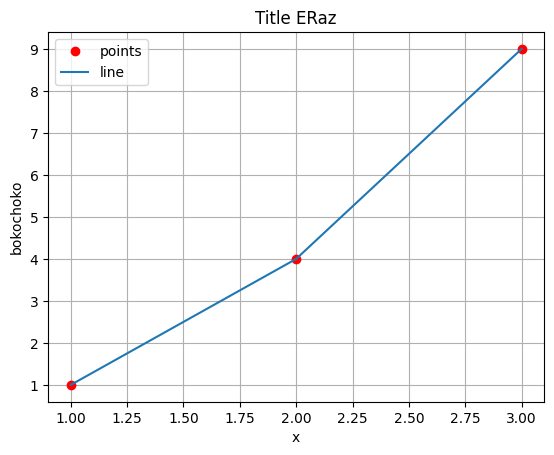

5


In [19]:
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [1, 4, 9]

plt.plot(x, y, 'ro', label = 'points')
plt.plot(x, y, label = 'line')

plt.title('Title ERaz')
plt.xlabel('x')
plt.ylabel('bokochoko')
plt.grid()
plt.legend()

plt.show()
print(5)